<a href="https://colab.research.google.com/github/mch60131242/Home/blob/main/Top10_Machine_Learning_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
from sklearn.model_selection import train_test_split, cross_val_score,StratifiedKFold
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier

In [82]:
!git clone https://github.com/taehojo/data.git

df = pd.read_csv('./data/pima-indians-diabetes3.csv')

fatal: destination path 'data' already exists and is not an empty directory.


In [83]:
print(df.head())
print(df.info())
df.columns

   pregnant  plasma  pressure  thickness  insulin   bmi  pedigree  age  \
0         6     148        72         35        0  33.6     0.627   50   
1         1      85        66         29        0  26.6     0.351   31   
2         8     183        64          0        0  23.3     0.672   32   
3         1      89        66         23       94  28.1     0.167   21   
4         0     137        40         35      168  43.1     2.288   33   

   diabetes  
0         1  
1         0  
2         1  
3         0  
4         1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   bmi        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   ag

Index(['pregnant', 'plasma', 'pressure', 'thickness', 'insulin', 'bmi',
       'pedigree', 'age', 'diabetes'],
      dtype='object')

In [84]:
X =df.iloc[:,0:8] ## test data
y =df.iloc[:,8]  ## target data
print(X)
print(Y)

     pregnant  plasma  pressure  thickness  insulin   bmi  pedigree  age
0           6     148        72         35        0  33.6     0.627   50
1           1      85        66         29        0  26.6     0.351   31
2           8     183        64          0        0  23.3     0.672   32
3           1      89        66         23       94  28.1     0.167   21
4           0     137        40         35      168  43.1     2.288   33
..        ...     ...       ...        ...      ...   ...       ...  ...
763        10     101        76         48      180  32.9     0.171   63
764         2     122        70         27        0  36.8     0.340   27
765         5     121        72         23      112  26.2     0.245   30
766         1     126        60          0        0  30.1     0.349   47
767         1      93        70         31        0  30.4     0.315   23

[768 rows x 8 columns]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
N

In [85]:
ss =StandardScaler()
scaled_X = pd.DataFrame(ss.fit_transform(X), columns=X.columns)
print(scaled_X)

     pregnant    plasma  pressure  thickness   insulin       bmi  pedigree  \
0    0.639947  0.848324  0.149641   0.907270 -0.692891  0.204013  0.468492   
1   -0.844885 -1.123396 -0.160546   0.530902 -0.692891 -0.684422 -0.365061   
2    1.233880  1.943724 -0.263941  -1.288212 -0.692891 -1.103255  0.604397   
3   -0.844885 -0.998208 -0.160546   0.154533  0.123302 -0.494043 -0.920763   
4   -1.141852  0.504055 -1.504687   0.907270  0.765836  1.409746  5.484909   
..        ...       ...       ...        ...       ...       ...       ...   
763  1.827813 -0.622642  0.356432   1.722735  0.870031  0.115169 -0.908682   
764 -0.547919  0.034598  0.046245   0.405445 -0.692891  0.610154 -0.398282   
765  0.342981  0.003301  0.149641   0.154533  0.279594 -0.735190 -0.685193   
766 -0.844885  0.159787 -0.470732  -1.288212 -0.692891 -0.240205 -0.371101   
767 -0.844885 -0.873019  0.046245   0.656358 -0.692891 -0.202129 -0.473785   

          age  
0    1.425995  
1   -0.190672  
2   -0.105584  

<AxesSubplot:ylabel='Density'>

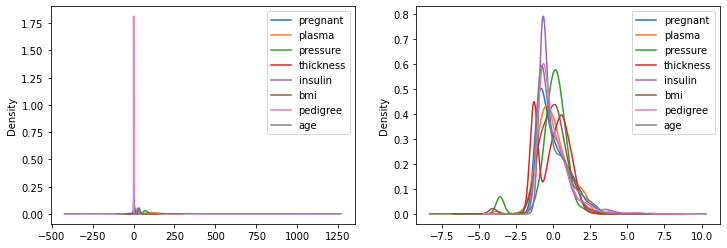

In [86]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
X.plot(kind='kde', ax=ax[0])
scaled_X.plot(kind='kde',ax=ax[1])

In [87]:
X_train, X_test, y_train,y_test = train_test_split(scaled_X, y, test_size=0.25, random_state=0)

In [88]:

##### 결정 트리#####


classifier =DecisionTreeClassifier()
classifier.fit(X_train,y_train)

y_pred= classifier.predict(X_test)

skf =StratifiedKFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)


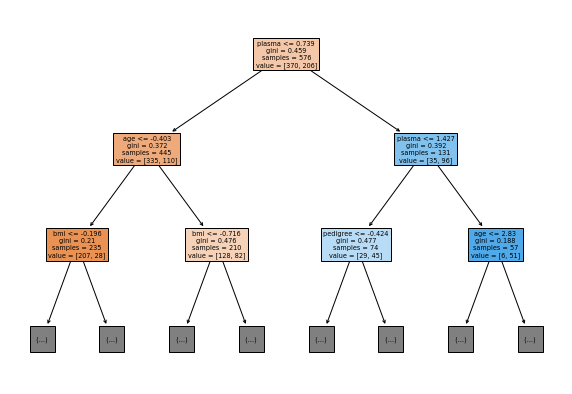

In [89]:
plt.figure(figsize=(10,7)) ## matplotlib으로 사이즈 지정
plot_tree(classifier,max_depth=2, filled=True, feature_names=['pregnant', 'plasma', 'pressure', 'thickness', 'insulin', 'bmi','pedigree', 'age', 'diabetes']) ## 특성의 이름을 정해주는 이유는 우리가 처음에 numpy로 만들어서 이름이 없는 상태로 숫자로만 특성이 이루어 졌기 때문
plt.show()

In [90]:
print(accuracies.mean())
print(accuracies.std())

0.6771022383545069
0.04182161246625684


In [91]:
##### 랜덤 포레스트 ####

classifier =RandomForestClassifier()

classifier.fit(X_train, y_train)## 트레인 데이터 타겟 데이터

y_pred =classifier.predict(X_test)

skf =StratifiedKFold(n_splits=10, shuffle=True)

accuracies = cross_val_score(estimator = classifier, X=X_train, y=y_train, cv =skf)

print(accuracies.mean())
print(accuracies.std())
                     

0.7502117362371445
0.0742582516729268


In [92]:
##### 가우시안 나이브 베이즈 분류기 #####
## 베이즈 정리란 조건부 확률을 계산 이전의 경험과 현재의 정보를 근거로 확률을 구해가는 과정
## 예측한 속성들이 상호 독립적일 때 이를 나이브 베이즈 분류 라고 한다##


classifier =GaussianNB()

classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

skf =StratifiedKFold(n_splits=10, shuffle=True)

accuracies =cross_val_score(estimator = classifier, X=X_train, y=y_train, cv= skf)

print(accuracies.mean())
print(accuracies.std())

0.7482758620689655
0.044589705957828595


In [93]:
### k-최근접 이웃

classifier = KNeighborsClassifier()

classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

skf =StratifiedKFold(n_splits=10, shuffle=True)

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

print(accuracies.mean())
print(accuracies.std())

0.7274954627949184
0.052899729599104967


In [94]:
## 에이다 부스트 분류##


classifier =AdaBoostClassifier()

classifier.fit(X_train,y_train)

y_pred =classifier.predict(X_test)

skf =StratifiedKFold(n_splits=10, shuffle=True)

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

print(accuracies.mean())
print(accuracies.std())

0.7327586206896551
0.042651712078366724


In [95]:
## 이차 판별 분석 분류##

## 불순도, 정보이득 ,약학습,강학습. 가중치의 개념이 들어감

classifier = QuadraticDiscriminantAnalysis()


classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

skf =StratifiedKFold(n_splits=10, shuffle=True)

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

print(accuracies.mean())
print(accuracies.std())



0.7258015728977616
0.051464920770588125


In [96]:
classifier=SVC(kernel='linear')

classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

skf =StratifiedKFold(n_splits=10, shuffle=True)

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

print(accuracies.mean())
print(accuracies.std())

0.7555656382335147
0.06624353258275975


In [97]:
classifier = SVC(kernel='rbf')

classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

skf =StratifiedKFold(n_splits=10, shuffle=True)

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

print(accuracies.mean())
print(accuracies.std())

0.7691167574107683
0.047827880881271954


In [98]:
clf1 =AdaBoostClassifier()
clf2 = RandomForestClassifier()
clf3 = SVC(kernel='linear')


classifier = VotingClassifier(estimators=[('lr',clf1),('rf',clf2),('gnb',clf3)])

classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

skf =StratifiedKFold(n_splits=10, shuffle=True)

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

print(accuracies.mean())
print(accuracies.std())

0.7381730187537809
0.05654363282482132


In [102]:
classifier = BaggingClassifier(base_estimator =SVC(kernel='rbf'), n_estimators=10)

classifier.fit(X_train,y_train)

y_preb = classifier.predict(X_test)

skf =StratifiedKFold(n_splits=10, shuffle=True)

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

print(accuracies.mean())
print(accuracies.std())

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble

0.7535087719298246
0.05693294707379573


In [130]:
classifiers=[DecisionTreeClassifier(),RandomForestClassifier(),GaussianNB(),KNeighborsClassifier(),SVC(kernel='linear'),SVC(kernel='rbf'),AdaBoostClassifier(),QuadraticDiscriminantAnalysis(),
             VotingClassifier(estimators=[('1',AdaBoostClassifier()),('2',RandomForestClassifier()),('3',SVC(kernel='linear'))]),BaggingClassifier(base_estimator =clf3, n_estimators=10,random_state=0)]
      
classifier_names = ['D_tree', 'RF','GNB', 'KNN','Ada','QDA','SVM_1','SVM_k','Voting','Bagging']

modelaccuracies = []
modelmeans= []
modelnames = []

classifier_data = zip(classifier_names,classifiers)
for classifier_name, classifier in classifier_data:
  skf =StratifiedKFold(n_splits=10, shuffle=True)
  accuracies = cross_val_score(classifier, X=X_train, y=y_train, cv = skf)
  print(classifier_name,":",(accuracies.mean()))
  modelaccuracies.append(accuracies)
  modelnames.append(classifier_name)
  modelmeans.append(accuracies.mean()*100)

D_tree : 0.6909860859044162
RF : 0.7413490623109498
GNB : 0.7501814882032667
KNN : 0.7256200846944949
Ada : 0.7603750756200847
QDA : 0.7655172413793103
SVM_1 : 0.7312462189957654
SVM_k : 0.7346037507562009
Voting : 0.7398971566848155


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble

Bagging : 0.7639443436176648


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


<BarContainer object of 10 artists>

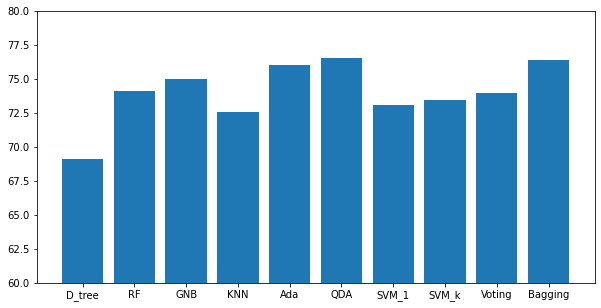

In [131]:
plt.figure(figsize=(10,5))
plt.ylim([60,80])
plt.bar(modelnames,modelmeans)


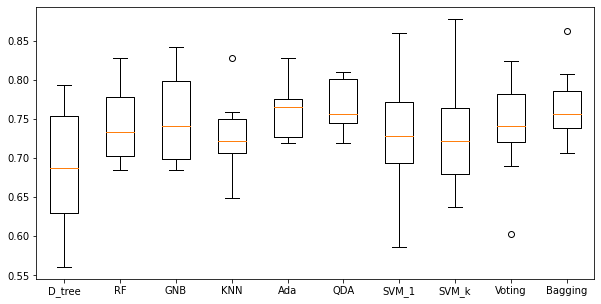

In [133]:
fig =plt.figure(figsize=(10,5))
ax =fig.add_subplot(111)
ax.boxplot(modelaccuracies)
ax.set_xticklabels(modelnames)
plt.show()